# Insurance Claims- Fraud Detection
## Problem Statement:
#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Note: Use the link below to reach to your dataset. 

#### Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

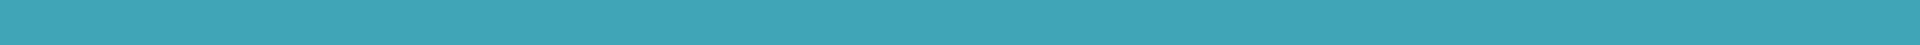

In [1]:
'''Importing Important Libraires'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In this case study, we have to predict the fraud in the Insurance Claim among all the observations. We are given the target class 'fraud_reported' in the dataset. So this is a type  classification model.

# Exploratory Data Analysis:
Moving ahead, making a copy of the dataset and perform complete EDA where we will draw different insights from the data.

In [3]:
pd.set_option('display.max_columns', 100)
ds = data.copy()
ds.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
ds.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


From the above description of continous values, we see that the minimum age of insurance client is 19 and maximum age is 64. also the oldest customer is 479 months old. Also, in the feature 'umbrella_limit' there is are values which are negative.These are invalid so we will remove these values.

In [5]:
ds.loc[ds['umbrella_limit'] < 0]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,29-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,3936 Tree Drive,13,1,YES,0,1,?,94160,8560,17120,68480,Chevrolet,Malibu,1996,N,NaN


In [6]:
# removing invalid value
ds.drop([290], inplace = True)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In the dataset, we have 21 features which are of object datatype including the target class. These features are categorical values which will be encoded. There are toatl 19 features which are continous out of which 17 are of int datatype and 2 are of float data type.

## Null Values Handling:
Having a look at the null values of the dataset. If there are null values persent in the data, then we will handle them accordingly.

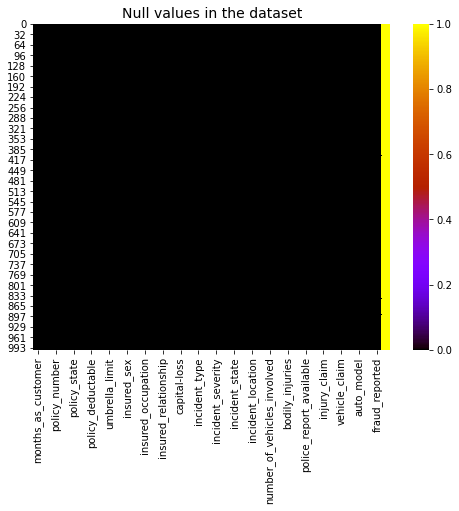

In [9]:
plt.figure(figsize = (8,6))
plt.title("Null values in the dataset", fontsize = 14)
sns.heatmap(ds.isnull(), cmap = 'gnuplot')
plt.show()

From the heatmap, we see that the last column '_c39' consists of only null values. We will remove it from the data. There is no null values present in the other columns of the datasets.

In [10]:
ds.drop(['_c39'], axis = 1, inplace = True)

## Feature Engineering:
Moving ahead to the feature engineering and their encoding, we will look at all the features, how they affect the target variable.

In [11]:
# Number of unique variables in each feature.
ds.nunique()

months_as_customer             391
age                             46
policy_number                  999
policy_bind_date               950
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          990
umbrella_limit                  10
insured_zip                    994
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_location              999
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries     

The features 'policy_number' and 'incident_location' are unique features which have different value for each observation. So, they will be removed from the data.

In [12]:
ds.drop(['policy_number', 'incident_location'], axis = 1, inplace = True)

In [14]:
# Value count of each categorical feature
for i in ds.columns:
    if ds[i].dtype == 'object':
        print(ds[i].value_counts(), '\n')

05-08-1992    3
28-04-1992    3
01-01-2006    3
20-09-1990    2
08-11-2009    2
             ..
18-03-2008    1
16-12-2011    1
13-10-1991    1
08-06-2005    1
08-10-1995    1
Name: policy_bind_date, Length: 950, dtype: int64 

OH    351
IL    338
IN    310
Name: policy_state, dtype: int64 

250/500     351
100/300     348
500/1000    300
Name: policy_csl, dtype: int64 

FEMALE    537
MALE      462
Name: insured_sex, dtype: int64 

JD             161
High School    160
Associate      144
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

machine-op-inspct    92
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64 

reading 

From the above value counts the categorical features, the we see that the features insured_zip, policy_blind_date, incident_date and auto_model can be removed from the dataset due to their cardinality

In [15]:
ds.drop(['insured_zip', 'policy_bind_date', 'incident_date', 'auto_model'], axis = 1, inplace = True)

The features police_report_available, property_damage, collision_type have values given as '?'. These vaues are unknown values and we will replace them with NaN, then we will fill these null values.

In [16]:
ds['police_report_available'].replace('?', np.NaN, inplace = True)
ds['property_damage'].replace('?', np.NaN, inplace = True)
ds['collision_type'].replace('?', np.NaN, inplace = True)

In [17]:
from scipy.stats import mode

In [18]:
# geting mode of 'police_report_available' after grouping observations by 'authorities_contacted'
police_report_available_mode = ds.pivot_table(values='police_report_available', columns='authorities_contacted',
                                              aggfunc=(lambda x:mode(x).mode[0]))
police_report_available_mode

authorities_contacted,Ambulance,Fire,None,Other,Police
police_report_available,NO,NO,NO,YES,NO


In [19]:
# replacing the null values with the mode of 'police_report_available'
loc1 = ds['police_report_available'].isnull()
ds.loc[loc1, 'police_report_available'] = ds.loc[loc1, 'authorities_contacted'].apply(lambda x: police_report_available_mode[x])

In [20]:
# geting mode of 'property_damage' after grouping observations by 'incident_severity'
property_damage_mode = ds.pivot_table(values = 'property_damage', columns = 'incident_severity', 
                                      aggfunc = (lambda x:mode(x).mode[0]))
property_damage_mode

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
property_damage,YES,NO,NO,NO


In [21]:
loc2 = ds['property_damage'].isnull()
ds.loc[loc2, 'property_damage'] = ds.loc[loc2, 'incident_severity'].apply(lambda x: property_damage_mode[x])

In [22]:
# geting mode of 'collision_type' after grouping observations by 'incident_type'
collision_type_mode = ds.pivot_table(values = 'collision_type', columns = 'incident_type', 
                                     aggfunc = (lambda x: mode(x).mode[0]))
collision_type_mode

incident_type,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
collision_type,Rear Collision,0,Rear Collision,0


We see from the mode of 'collision_type' feature that still some places have null values present in the mode values. So for these column, we cannot replace the values with mode after grouping, hence we will just replace it with the value 'Unknown'

In [23]:
ds['collision_type'].replace(np.NaN, 'Unknown',inplace = True)

Now, we will have a look the relation between the target and columns using the count plots.

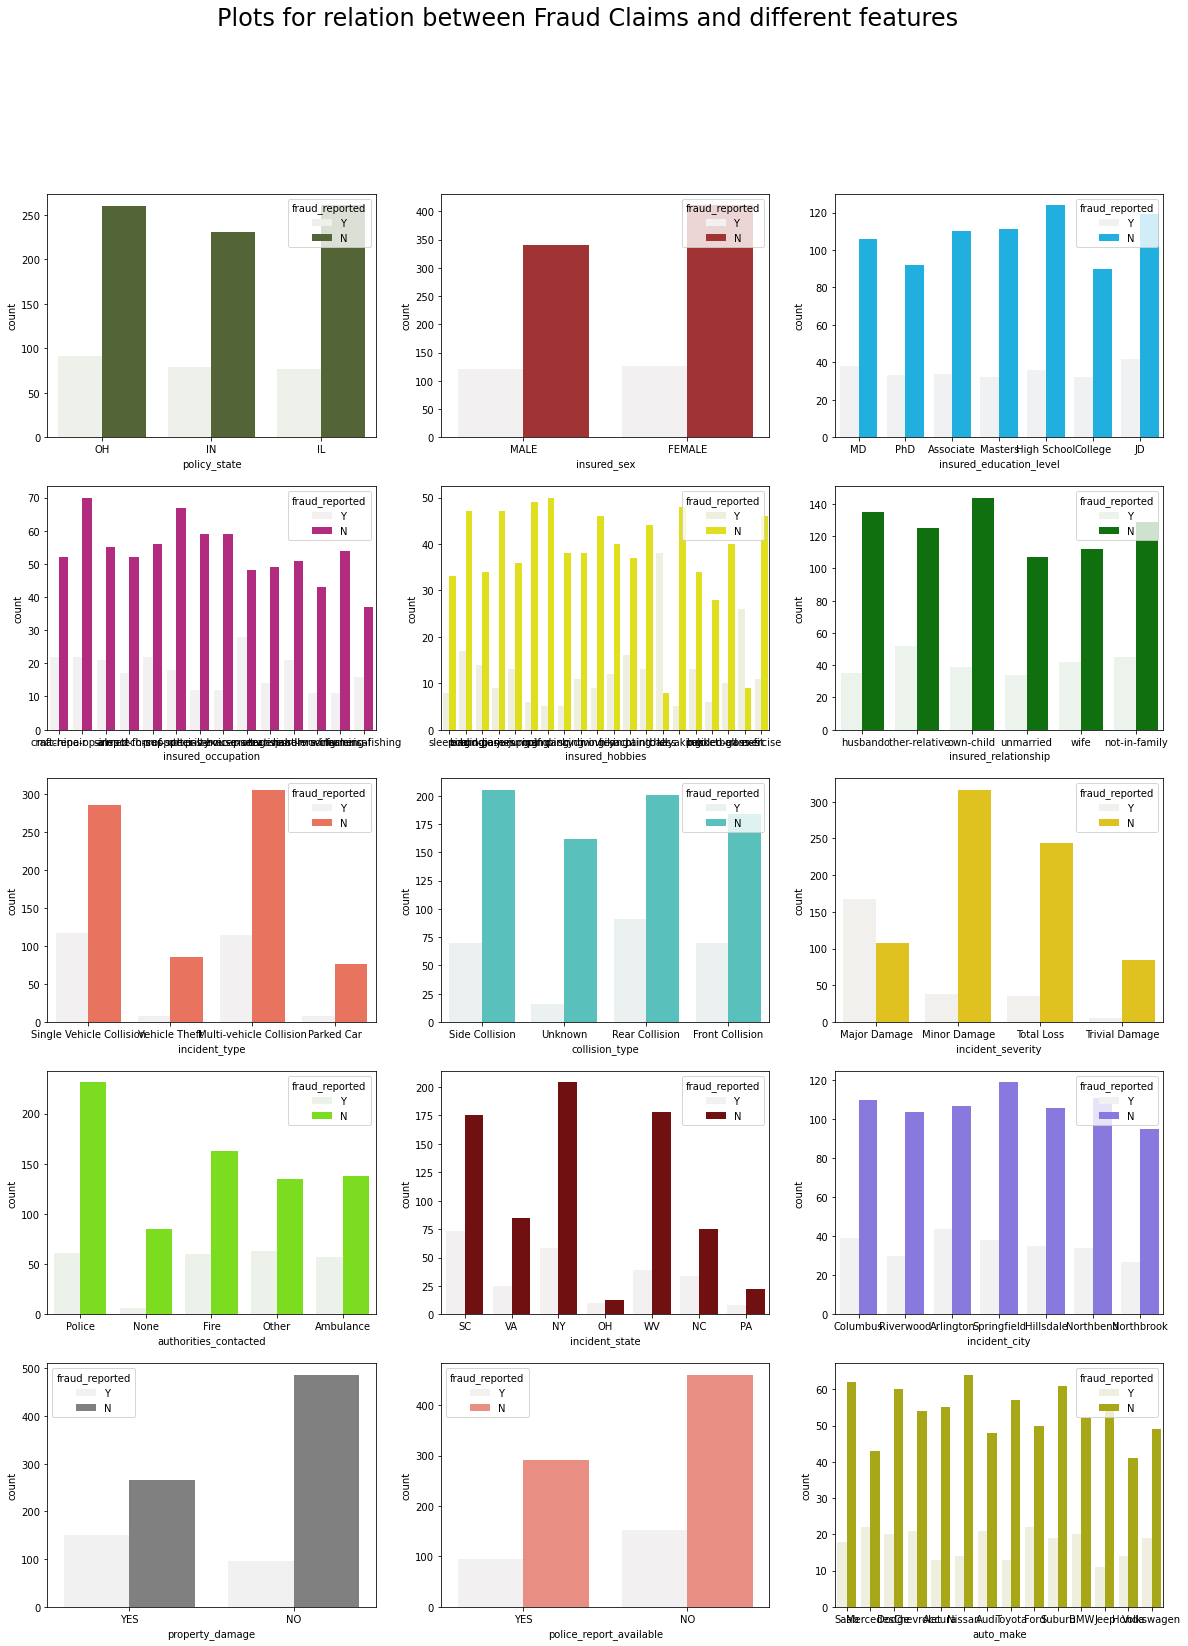

In [28]:
categorical_list = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 
                    'insured_relationship', 'incident_type','collision_type', 'incident_severity', 'authorities_contacted', 
                    'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make']

colour_list = ['darkolivegreen', 'firebrick', 'deepskyblue', 'mediumvioletred', 'yellow', 'green', 'tomato', 'mediumturquoise', 
               'gold', 'lawngreen', 'maroon', 'mediumslateblue', 'grey', 'salmon', 'y']

plt.figure(figsize = (20,26))
plt.suptitle("Plots for relation between Fraud Claims and different features", fontsize = 24)

for i in range(0, len(categorical_list)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x = ds[categorical_list[i]], hue = ds['fraud_reported'], color = colour_list[i])

## Outliers Handling:
Moving ahead, we will look at the box plots of the different continous features to see the outliers present in the dataset. If outliers are present, we will treat them accordingly.

In [29]:
plt.style.use('ggplot')

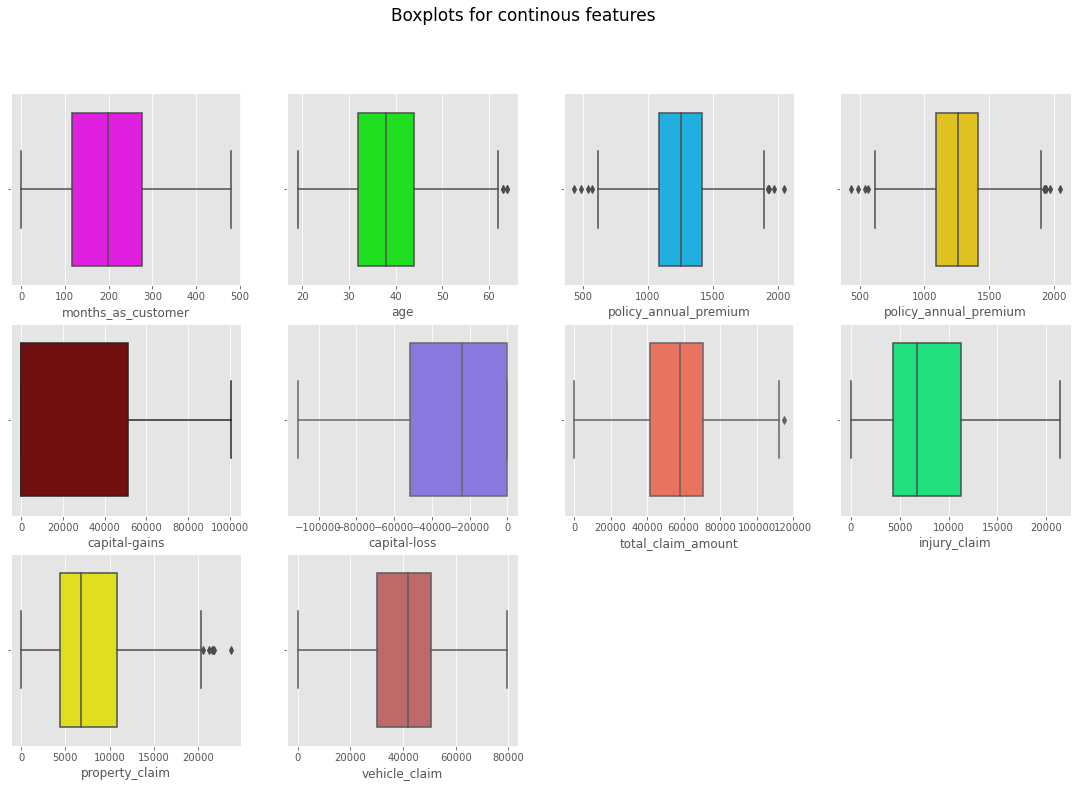

In [34]:
continous_list = ['months_as_customer', 'age', 'policy_annual_premium', 'policy_annual_premium', 'capital-gains', 
                   'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

colour_list = ['magenta', 'lime', 'deepskyblue', 'gold', 'maroon', 'mediumslateblue', 'tomato', 'springgreen', 'yellow', 
              'indianred']

plt.figure(figsize = (19, 12))
plt.suptitle("Boxplots for continous features", fontsize = 17)

for i in range(0, len(continous_list)):
    plt.subplot(3,4,i+1)
    sns.boxplot(ds[continous_list[i]], color = colour_list[i])

As we can see from the boxplots, that the outliers are very less or may not be present for the continous featuers, so we donot need to treat them.
## Feature Encoding:
Once the features are cleaned and engineered, and the outliers are trearted, we can encode the categorical values. For that we will look at the valuecounts of different features and then encode them accordingly using different techniques.

In [35]:
# Value count of each categorical feature
for i in ds.columns:
    if ds[i].dtype == 'object':
        print(ds[i].value_counts(), '\n')

OH    351
IL    338
IN    310
Name: policy_state, dtype: int64 

250/500     351
100/300     348
500/1000    300
Name: policy_csl, dtype: int64 

FEMALE    537
MALE      462
Name: insured_sex, dtype: int64 

JD             161
High School    160
Associate      144
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

machine-op-inspct    92
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64 

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          53
yachting          53
hiking            52
video-games       50
base-

After looking at the value counts for different columns, we will encode the features in following manner,
1. **Feature Encoding**-
    - insured_education_level
    - insured_relationship
    - incident_type
    - authorities_contacted
    - incident_state
    - incident_city
    - collision_type
2. **Ordinal Encoding**-
    - incident_severity
    - insured_sex
    - insured_hobbies
    - property_damage
    - police_report_available
3. **One-hot Encoding**-
    - policy_state

The target variable fraud_reported will be encoded using label encoding.

In [36]:
# frequency encoding 'insured_education_level'
insured_education_level_enc = (ds.groupby('insured_education_level').size()) / len(ds)
print(insured_education_level_enc)

ds['insured_education_level'] = ds['insured_education_level'].apply(lambda x: insured_education_level_enc[x])
ds['insured_education_level'].head()

insured_education_level
Associate      0.144144
College        0.122122
High School    0.160160
JD             0.161161
MD             0.144144
Masters        0.143143
PhD            0.125125
dtype: float64


0    0.144144
1    0.144144
2    0.125125
3    0.125125
4    0.144144
Name: insured_education_level, dtype: float64

In [37]:
# frequency encoding 'insured_education_level'
insured_relationship_enc = (ds.groupby('insured_relationship').size()) / len(ds)
print(insured_relationship_enc)

ds['insured_relationship'] = ds['insured_relationship'].apply(lambda x: insured_relationship_enc[x])
ds['insured_relationship'].head()

insured_relationship
husband           0.170170
not-in-family     0.174174
other-relative    0.177177
own-child         0.183183
unmarried         0.141141
wife              0.154154
dtype: float64


0    0.170170
1    0.177177
2    0.183183
3    0.141141
4    0.141141
Name: insured_relationship, dtype: float64

In [38]:
# frequency encoding 'incident_type'
incident_type_enc = (ds.groupby('incident_type').size()) / len(ds)
print(incident_type_enc)

ds['incident_type'] = ds['incident_type'].apply(lambda x: incident_type_enc[x])
ds['incident_type'].head()

incident_type
Multi-vehicle Collision     0.419419
Parked Car                  0.084084
Single Vehicle Collision    0.402402
Vehicle Theft               0.094094
dtype: float64


0    0.402402
1    0.094094
2    0.419419
3    0.402402
4    0.094094
Name: incident_type, dtype: float64

In [39]:
# frequency encoding 'authorities_contacted'
authorities_contacted_enc = (ds.groupby('authorities_contacted').size()) / len(ds)
print(authorities_contacted_enc)

ds['authorities_contacted'] = ds['authorities_contacted'].apply(lambda x: authorities_contacted_enc[x])
ds['authorities_contacted'].head()

authorities_contacted
Ambulance    0.195195
Fire         0.223223
None         0.091091
Other        0.198198
Police       0.292292
dtype: float64


0    0.292292
1    0.292292
2    0.292292
3    0.292292
4    0.091091
Name: authorities_contacted, dtype: float64

In [40]:
# frequency encoding 'incident_state'
incident_state_enc = (ds.groupby('incident_state').size()) / len(ds)
print(incident_state_enc)

ds['incident_state'] = ds['incident_state'].apply(lambda x: incident_state_enc[x])
ds['incident_state'].head()

incident_state
NC    0.109109
NY    0.262262
OH    0.023023
PA    0.030030
SC    0.248248
VA    0.110110
WV    0.217217
dtype: float64


0    0.248248
1    0.110110
2    0.262262
3    0.023023
4    0.262262
Name: incident_state, dtype: float64

In [41]:
# frequency encoding 'incident_city'
incident_city_enc = (ds.groupby('incident_city').size()) / len(ds)
print(incident_city_enc)

ds['incident_city'] = ds['incident_city'].apply(lambda x: incident_city_enc[x])
ds['incident_city'].head()

incident_city
Arlington      0.151151
Columbus       0.149149
Hillsdale      0.141141
Northbend      0.145145
Northbrook     0.122122
Riverwood      0.134134
Springfield    0.157157
dtype: float64


0    0.149149
1    0.134134
2    0.149149
3    0.151151
4    0.151151
Name: incident_city, dtype: float64

In [42]:
# frequency encoding 'collision_type'
collision_type_enc = (ds.groupby('collision_type').size()) / len(ds)
print(collision_type_enc)

ds['collision_type'] = ds['collision_type'].apply(lambda x: collision_type_enc[x])
ds['collision_type'].head()

collision_type
Front Collision    0.254254
Rear Collision     0.292292
Side Collision     0.275275
Unknown            0.178178
dtype: float64


0    0.275275
1    0.178178
2    0.292292
3    0.254254
4    0.178178
Name: collision_type, dtype: float64

In [43]:
# encoding 'incident_severity'
severity_map = {'Trivial Damage': 0, 'Minor Damage': 1, 'Major Damage': 2, 'Total Loss': 3}

ds['incident_severity'] = ds['incident_severity'].map(severity_map)

In [44]:
# encoding 'insured_sex'
sex_map = {'MALE': 1, 'FEMALE': 0}

ds['insured_sex'] = ds['insured_sex'].map(sex_map)

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
oe = OrdinalEncoder()
# encoding 'insured_hobbies'
ds['insured_hobbies'] = oe.fit_transform(ds[['insured_hobbies']])

# encoding 'auto_make'
ds['auto_make'] = oe.fit_transform(ds[['auto_make']])

# encoding 'insured_occupation'
ds['insured_occupation'] = oe.fit_transform(ds[['insured_occupation']])

In [47]:
# encoding 'property_damage'
ds['property_damage'] = ds['property_damage'].map({'YES':1,'NO':0})

# encoding 'police_report_available'
ds['police_report_available'] = ds['police_report_available'].map({'YES':1,'NO':0})

In [48]:
# encoding 'policy_state' using one-hot encoding
ds = pd.get_dummies(ds, columns = ['policy_state'], drop_first = True)

In [49]:
# encoding target using label encoding
ds['fraud_reported'] = ds['fraud_reported'].map({'Y':1,'N':0})

In [50]:
print("Dataset after the encoding")
ds

Dataset after the encoding


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,policy_state_IN,policy_state_OH
0,328,48,250/500,1000,1406.91,0,1,0.144144,2.0,17.0,0.170170,53300,0,0.402402,0.275275,2,0.292292,0.248248,0.149149,5,1,1,1,2,1,71610,6510,13020,52080,10.0,2004,1,0,1
1,228,42,250/500,2000,1197.22,5000000,1,0.144144,6.0,15.0,0.177177,0,0,0.094094,0.178178,1,0.292292,0.110110,0.134134,8,1,0,0,0,0,5070,780,780,3510,8.0,2007,1,1,0
2,134,29,100/300,2000,1413.14,5000000,0,0.125125,11.0,2.0,0.183183,35100,0,0.419419,0.292292,1,0.292292,0.262262,0.149149,7,3,0,2,3,0,34650,7700,3850,23100,4.0,2007,0,0,1
3,256,41,250/500,2000,1415.74,6000000,0,0.125125,1.0,2.0,0.141141,48900,-62400,0.402402,0.254254,2,0.292292,0.023023,0.151151,5,1,1,1,2,0,63400,6340,6340,50720,3.0,2014,1,0,0
4,228,44,500/1000,1000,1583.91,6000000,1,0.144144,11.0,2.0,0.141141,66000,-46000,0.094094,0.178178,1,0.091091,0.262262,0.151151,20,1,0,0,1,0,6500,1300,650,4550,0.0,2009,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,500/1000,1000,1310.80,0,0,0.143143,2.0,13.0,0.141141,0,0,0.402402,0.254254,1,0.223223,0.109109,0.122122,20,1,1,0,1,0,87200,17440,8720,61040,6.0,2006,0,0,1
996,285,41,100/300,1000,1436.79,0,0,0.125125,9.0,17.0,0.154154,70900,0,0.402402,0.292292,2,0.223223,0.248248,0.145145,23,1,1,2,3,0,108480,18080,18080,72320,13.0,2015,0,0,0
997,130,34,250/500,500,1383.49,3000000,0,0.143143,1.0,3.0,0.177177,35100,0,0.419419,0.275275,1,0.292292,0.109109,0.151151,4,3,0,2,3,1,67500,7500,7500,52500,11.0,1996,0,0,1
998,458,62,500/1000,2000,1356.92,5000000,1,0.144144,5.0,0.0,0.154154,0,0,0.402402,0.292292,2,0.198198,0.262262,0.151151,2,1,1,0,1,1,46980,5220,5220,36540,1.0,1998,0,0,0


As we see that we have encoded the categorical features. There is one feature 'policy_csl' which is continous with the single limit values, but it is taken as object due to character present in the column. We will seperate the values in this feature using split function.

In [51]:
ds[['policy_csl_a','policy_csl_b']] = ds['policy_csl'].str.split("/",expand=True,)
ds['policy_csl_a'] = ds['policy_csl_a'].astype(np.int64)
ds['policy_csl_b'] = ds['policy_csl_b'].astype(np.int64)

ds.drop(['policy_csl'], axis = 1, inplace = True)

## Correlation:
Now, we look at thte correlation between different featurs and the target variable.

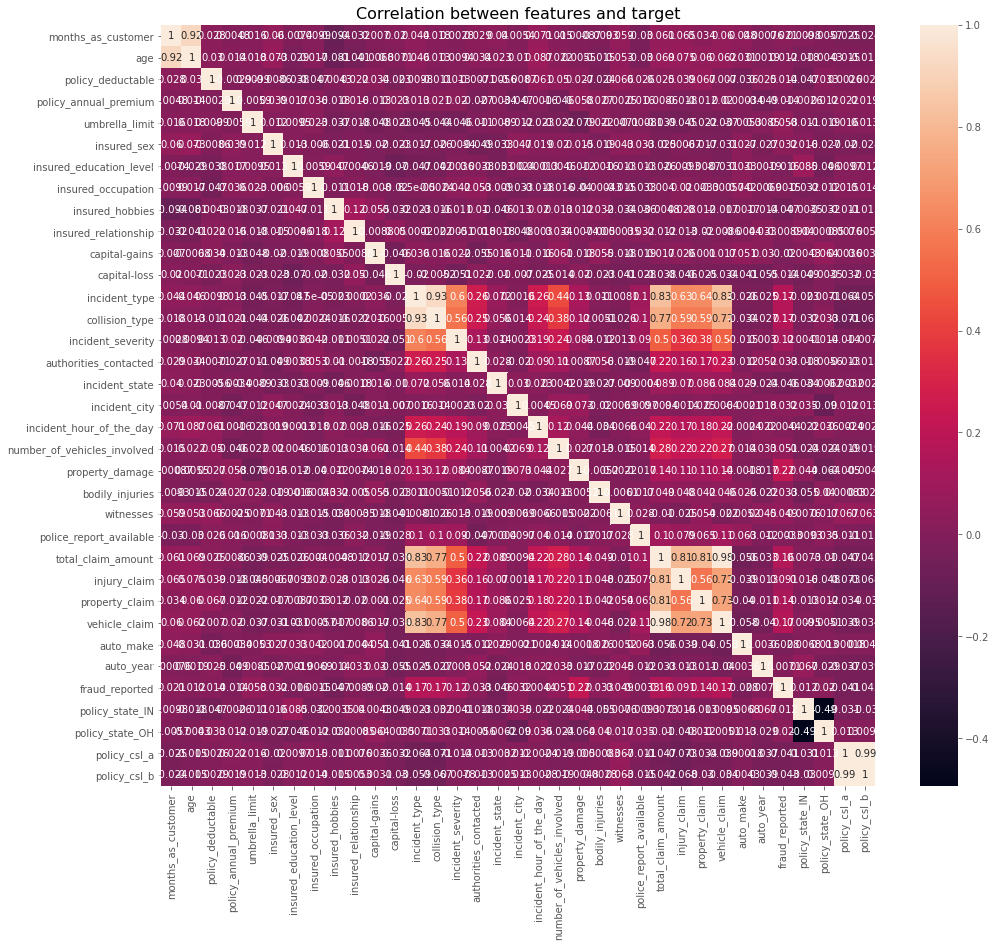

In [53]:
plt.figure(figsize = (16,14))
plt.title("Correlation between features and target", fontsize = 16)
sns.heatmap(ds.corr(), annot =True)
plt.show()

From the above heatmap, we see that the feature 'vehicle_claim' has 0.98 correlation with 'total_claim_amount'. Also, 'policy_csl_a' has 0.99 correlation with 'policy_csl_b'. So both of these features will be removed from the dataset to avoid colinearity. 

In [54]:
ds.drop(['vehicle_claim', 'policy_csl_a'], axis = 1, inplace = True)

In [55]:
ds['Fraud_reported'] = ds['fraud_reported']
ds.drop(['fraud_reported'], axis = 1, inplace =True)

## Scaling the data:
In the dataset, we see that we have different features with obesrvations consisting of various scales of data. So it is important to scale the data before the moderlk building to improve the performane of the model. Hence, we scale the data using the Standard scaler.

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds.loc[:,'months_as_customer':'policy_csl_b'] = scaler.fit_transform(ds.loc[:,'months_as_customer':'policy_csl_b'])
ds

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_year,policy_state_IN,policy_state_OH,policy_csl_b,Fraud_reported
0,1.078558,0.990731,-0.223433,0.616768,-0.480353,1.078118,-0.006863,-1.157915,1.281352,0.160266,1.010334,0.954763,0.394252,0.446760,0.263600,1.250172,0.637289,0.517212,-0.955605,-0.824557,1.183825,0.008550,0.461213,1.257535,0.716353,-0.188963,1.169319,0.855489,-0.185076,-0.670766,1.358732,-0.280143,1
1,0.209637,0.334259,1.411801,-0.242077,1.696927,1.078118,-0.006863,-0.162641,0.928861,0.660820,-0.902746,0.954763,-2.104836,-2.008012,-0.773157,1.250172,-1.310564,-0.903842,-0.524028,-0.824557,-0.844719,-1.211668,-1.338598,-0.795206,-1.807066,-1.362945,-1.372787,0.359618,0.314179,1.490832,-0.735980,-0.280143,1
2,-0.607149,-1.088095,1.411801,0.642285,1.696927,-0.927543,-1.378113,1.081451,-1.362329,1.089866,0.357087,0.954763,0.532189,0.876977,-0.773157,1.250172,0.834897,0.517212,-0.667887,1.139049,-0.844719,1.228768,1.361118,-0.795206,-0.685294,0.054849,-0.735184,-0.632124,0.314179,-0.670766,1.358732,-0.976319,0
3,0.452935,0.224847,1.411801,0.652934,2.132383,-0.927543,-1.378113,-1.406733,-1.362329,-1.913457,0.852406,-1.266566,0.394252,-0.084686,0.263600,1.250172,-2.538557,0.706686,-0.955605,-0.824557,1.183825,0.008550,0.461213,-0.795206,0.405002,-0.223793,-0.218040,-0.880059,1.479107,-0.670766,-0.735980,-0.280143,1
4,0.209637,0.553083,-0.223433,1.341721,2.132383,1.078118,-0.006863,1.081451,-1.362329,-1.913457,1.466171,-0.682755,-2.104836,-2.008012,-0.773157,-2.275330,0.834897,0.706686,1.202283,-0.824557,-0.844719,-1.211668,-0.438692,-0.795206,-1.752835,-1.256406,-1.399787,-1.623866,0.647016,-0.670766,-0.735980,1.460297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.745435,-0.103388,-0.223433,0.223122,-0.480353,-0.927543,-0.079034,-1.157915,0.576370,-1.913457,-0.902746,0.954763,0.394252,-0.084686,-0.773157,0.039925,-1.324679,-2.040685,1.202283,-0.824557,1.183825,-1.211668,-0.438692,-0.795206,1.307577,2.050415,0.276259,-0.136253,0.147761,-0.670766,1.358732,1.460297,0
996,0.704922,0.224847,-0.223433,0.739150,-0.480353,-0.927543,-1.378113,0.583814,1.281352,-0.983857,1.642045,0.954763,0.394252,0.876977,0.263600,0.039925,0.637289,0.138265,1.633861,-0.824557,1.183825,1.228768,1.361118,-0.795206,2.114586,2.181540,2.220223,1.599296,1.645525,-0.670766,-0.735980,-0.976319,0
997,-0.641905,-0.541036,-1.041050,0.520845,0.826015,-0.927543,-0.079034,-1.406733,-1.186084,0.660820,0.357087,0.954763,0.532189,0.446760,-0.773157,1.250172,-1.324679,0.706686,-1.099465,1.139049,-0.844719,1.228768,1.361118,1.257535,0.560488,0.013872,0.022879,1.103425,-1.516422,-0.670766,1.358732,-0.280143,0
998,2.208155,2.522497,1.411801,0.412020,1.696927,1.078118,-0.006863,-0.411460,-1.714820,-0.983857,-0.902746,0.954763,0.394252,0.876977,0.263600,-0.398570,0.834897,0.706686,-1.387183,-0.824557,1.183825,-1.211668,-0.438692,1.257535,-0.217699,-0.453262,-0.450651,-1.375930,-1.183585,-0.670766,-0.735980,1.460297,0


We see that now we have the scaled data which can be used by the model.
## Data Imbalanced:
The data that we have can be imbalanced on the target variable. This can result in the overfitting or underfitting of the model which is bad. So we check the imbalance of the data using histplot.

In [58]:
x = ds.loc[:,'months_as_customer':'policy_csl_b']
y = ds.loc[:,'Fraud_reported']

In [63]:
plt.style.use('seaborn')

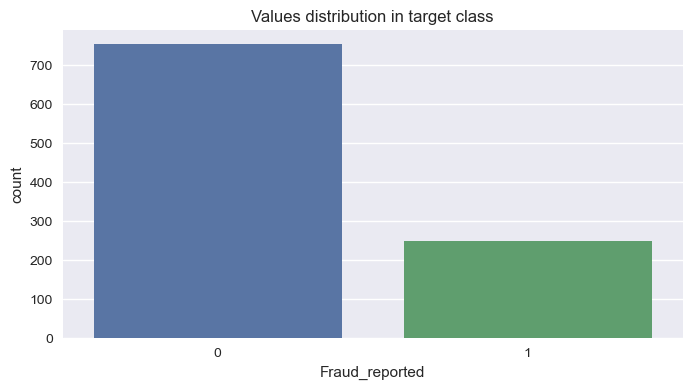

In [64]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class")
sns.countplot(data = ds, x = 'Fraud_reported')
plt.show()

As we can see that the dataset is heavily imbalanced with majority of values for fraud reported as NO as compared to YES. We will balance the data using the SMOTETomek over-sampler.

In [65]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)
print(x_new.shape, y_new.shape)

(1492, 32) (1492,)


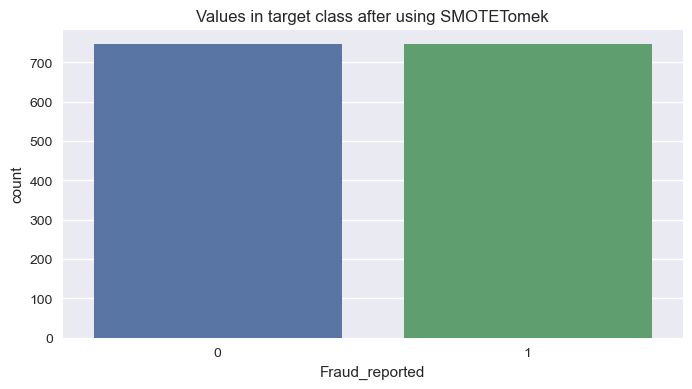

In [66]:
plt.figure(figsize = (8, 4))
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show()

As we can see that the data is now balanced and will not result in the overfitting or under fitting.

# MODEL BUILDING:

Now that we have the clean scaled and balanced data, we will build various models using this data, but before that, we find out what is the best possible random state for slitting the training an testing data.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 125, 72.11796246648794


We see that the best possible random state is 125, so we will use it for splitting the data.

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = 125)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1119, 32) (373, 32) (1119,) (373,)


## Model Fitting:
We now have the training and testing data with us, we will use various models to fit these data and look at their accuracy scores. For this data, we will use 6 models- 'Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier', 'ADA Boost Classifier'. MultonimialNB model will be not used as we have negative values in the dataset after scaling.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [71]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 72.11796246648794
Accuracy Score of Decision Tree Classifier model is 86.05898123324397
Accuracy Score of K-Nearest Neighbour Classifier model is 70.77747989276139
Accuracy Score of Support Vector Classifier model is 86.05898123324397
Accuracy Score of Random Forest model is 90.61662198391421
Accuracy Score of ADA Boost model is 86.05898123324397


After the model fitting, we have the best scores from the Random Forest Classifier model.
## Cross Validating the models:
As we see that RFC model has the best accuracy scores in al the models. But this can be result of overfitting. IN order to find out the real best model, we will cross validate the models and compare their mean accuracy scores.

In [72]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x_new, y_new, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x_new, y_new, cv = 10)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.69333333 0.62       0.60402685 0.67114094 0.71812081 0.66442953
 0.67785235 0.68456376 0.74496644 0.65100671]
Mean of accuracy scores is for Logistic Regression is 67.29440715883669

[0.78666667 0.73333333 0.75838926 0.8590604  0.91275168 0.85234899
 0.83892617 0.87248322 0.9261745  0.89261745]
Mean of accuracy scores is for Decision Tree Classifier is 84.32751677852349

[0.64666667 0.67333333 0.6442953  0.67114094 0.69127517 0.67785235
 0.71812081 0.69798658 0.72483221 0.61744966]
Mean of accuracy scores is for KNN Classifier is 67.62953020134228

[0.8        0.69333333 0.75167785 0.87248322 0.87248322 0.89261745
 0.86577181 0.9261745  0.90604027 0.84563758]
Mean of accuracy scores is for SVC Classifier is 84.26219239373603

[0.72666667 0.71333333 0.73154362 0.9261745  0.93288591 0.91946309
 0.94630872 0.96644295 0.97315436 0.95302013]
Mean of accuracy scores is for Random Forest Classifier is 87.88993288590603

[0.74666667 0.70666667 0.76510067 0.89932886 0.89932886 0.89932886
 0.

In [73]:
# Checking for difference between accuracy and mean accuracies.
lis3 = ['Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier', 
        'ADA Boost Classifier']

lis1 = [accuracy_score(y_test, pred_lg)*100, accuracy_score(y_test, pred_dtc)*100, accuracy_score(y_test, pred_knc)*100, 
        accuracy_score(y_test, pred_svc)*100, accuracy_score(y_test, pred_rfc)*100, accuracy_score(y_test, pred_ada)*100]

lis2 = [lg_scores.mean()*100, dtc_scores.mean()*100, knc_scores.mean()*100, svc_scores.mean()*100, rfc_scores.mean()*100, 
        ada_scores.mean()*100]

for i in range(0, 6):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Logistic Regression 4.823555307651247
Decision Tree Classifier 1.7314644547204807
KNeighbors Classifier 3.1479496914191145
SVC 1.7967888395079399
Random Forest Classifier 2.7266890980081797
ADA Boost Classifier -0.5548890128410449


After the cross validation, we see that the least difference between mean accuracies and total accuracy is given by Support Vector Machine Classifier, so we will use it the build the final model.
## Hyperparameter Tuning:
We have selected the SVC as the best possible model for this case study, we will now tune the parameters of this model to get the best possible results.

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
svc = SVC()
parameters = { 'kernel' : ['rbf', 'linear'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]}
gs = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'f1', cv = 5)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8927876610611161
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


The best parameters fot he model are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}. We will use these parameters to build the model.

In [76]:
svc = SVC(kernel = 'rbf', C = 10, gamma = 0.1)
svc.fit(x_train, y_train)
print(svc.score(x_train, y_train))
pred_svc = svc.predict(x_test)

1.0


# MODEL EVALUATION:
We have built the model with Support Vector Classifier. Evaluating this model using the confusion matrix, classification report and ROC curve and measuring its performance.

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

In [78]:
plt.style.use('ggplot')

Accuracy Score of SVC model is 0.9463806970509383
Confusion matrix for SVC Model is
[[174   8]
 [ 12 179]]
Classification Report of the SVC Model is
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       182
           1       0.96      0.94      0.95       191

    accuracy                           0.95       373
   macro avg       0.95      0.95      0.95       373
weighted avg       0.95      0.95      0.95       373



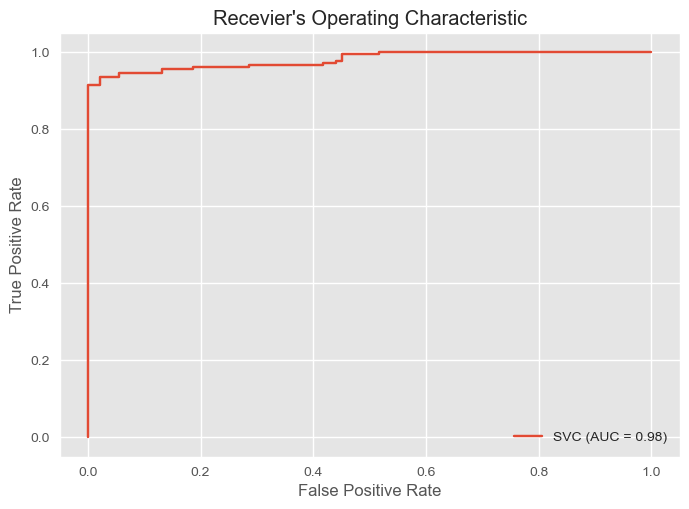

In [79]:
print("Accuracy Score of SVC model is", accuracy_score(y_test, pred_svc))
print("Confusion matrix for SVC Model is")
print(confusion_matrix(y_test, pred_svc))
print("Classification Report of the SVC Model is")
print(classification_report(y_test, pred_svc))

plot_roc_curve(svc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The AUC score for the SVC model is 0.98. The precision and recall for the target class 0 and 1 are 0.94 and 0.96. We have achieved an f1-score of 0.95. The model is performing very accurately.

![](https://www.theeagleinn.com/wp-content/uploads/2017/11/stacked_page_divider_image-1378934968-tapestry-d.png)

# Serialisation:
Saving the SVC model as an object.

In [80]:
import joblib
joblib.dump(svc, 'Insurance_Claim_Fraud_Prediction.obj') # saving the model as an object

['Insurance_Claim_Fraud_Prediction.obj']